## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head(), len(df)

(   temperature gender  heart_rate
 0         99.3      F        68.0
 1         98.4      F        81.0
 2         97.8      M        73.0
 3         99.2      F        66.0
 4         98.0      F        73.0, 130)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns
import scipy as sci

In [7]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [8]:
import math as m

### Is the distribution of body temperatures normal?

(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

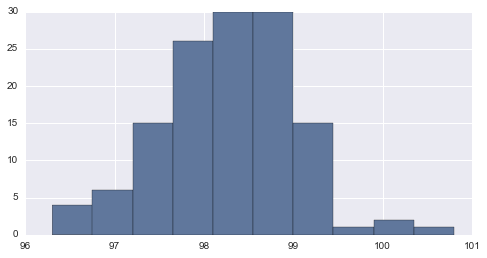

In [9]:
plt.hist(df.temperature)

In [10]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [11]:
import scipy.stats as stats

In [12]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Given the null hypothesis that df.temperature came from a normal distribution, the p-value represents the probability that a chi-squared statistic that large (or larger) would be seen

##### The body temperatures of humans will be a normal dist

### Is the true population mean really 98.6 degrees F?

 Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

In [13]:
# Want to test that the population mean body temp is 98.6 degrees F w/ significance level of 5%

*Ho: average body temp = 98.6

*H1: average body temp <> 98.6

Assuming, Ho is true, what is the probability that we would have gotten mean of 98.249231 w/ std 0.733183 of the sample?

Mean of our sample distribution would be equal to the mean of our population distribution

<img src="images/samp-sigma-xbar.png">

#### standard deviation of our sampling distribution
We do not know the standard deviation of the population so we approximate it to be the std_sample

In [14]:
mean_sample = df.temperature.mean()
std_sample = df.temperature.std()
num_samples = len(df.temperature)
std_sampling_dist = std_sample / (m.sqrt(num_samples))

In [15]:
std_sampling_dist

0.06430441683789101

Assume null hypothesis is true, how many std deviations (standard error), is the sample mean away from the population mean?

AKA a Z-statistic:

<img src="images/zstat.png">

In [16]:
z_stat = (98.6 - mean_sample) / std_sampling_dist
print(z_stat)

5.454823292364079


In [17]:
p_value = stats.norm.sf(abs(z_stat))*2
print(p_value)

4.90215701411e-08


#### The probability of returning a sample mean of 98.249, given the null hypothesis is true (98.6), holds way less than a 5% chance, so we can reject null hypothesis  and accept alternative hypothesis that the true population mean is not 98.6

### At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [50]:
z_critical = stats.norm.ppf(q = 0.975)
print("z critical: %s" % z_critical)
margin_of_error = z_critical*std_sampling_dist
print("margin of error: %s" % margin_of_error)
confidence_interval = (mean_sample - margin_of_error, 
                       mean_sample + margin_of_error)
print("confidence interval:")
print(confidence_interval)

z critical: 1.95996398454
margin of error: 0.126034341049
confidence interval:
(98.123196428181657, 98.375265110279898)


### Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

In [37]:
df.head(1)

,temperature,gender,heart_rate
0,99.3,F,68.0


In [44]:
males_temp = df[df.gender == 'M']
females_temp = df[df.gender == 'F']

In [46]:
len(males_temp),len(females_temp)

(65, 65)

In [86]:
mavg = males_temp.temperature.mean()
favg = females_temp.temperature.mean()
mnum = len(males_temp)
fnum = len(females_temp)
mstd = males_temp.temperature.std()
fstd = females_temp.temperature.std()
print("male- avg: %s num: %s std: %s" %(mavg,mnum,mstd))
print("female- avg: %s num: %s std: %s" %(favg,fnum,fstd))
diff_means = favg - mavg
print("difference of means: %s" %diff_means)

male- avg: 98.1046153846154 num: 65 std: 0.6987557623265908
female- avg: 98.39384615384613 num: 65 std: 0.7434877527313665
difference of means: 0.289230769230727


*Ho: favg - mavg = 0

*H1: favg - mavg > 0

In [73]:
z_critical_ = stats.norm.ppf(q = 0.95)
print("At alpha of .05, the amount of standard deviations this is away from the population mean is: %s" % z_critical_)

At alpha of .05, the amount of standard deviations this is away from the population mean is: 1.64485362695


Now calculate the standard deviation of the distribution of the differences of the means

<img src="images/chapte22.gif">

In [85]:
std_dif_means = m.sqrt((fstd**2)/fnum + (mstd**2)/mnum)
std_dif_means

0.12655395041982642

z_stat_ = 

<img src="images/zstat2.gif">

In [84]:
z_stat_ = (favg - mavg)/std_dif_means
z_stat_

2.285434538165274

In [89]:
print ("The largest the difference of the sample means can be in order for the population means to be considered the same (at a alpha .05) is %s" %(std_dif_means*z_critical))

The largest the difference of the sample means can be in order for the population means to be considered the same (at a alpha .05) is 0.208162724353


In [90]:
print("The difference of the sample means is %s , which is larger so we can reject null hypothesis and accept that there is a difference"%diff_means)

The difference of the sample means is 0.289230769230727 , which is larger so we can reject null hypothesis and accept that there is a difference
